In [3]:
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(database="piscineds",
                        user='mpellegr', password='mysecretpassword', 
                        host='localhost', port='5432'
)
cursor = conn.cursor()

In [4]:
cursor.execute("SELECT price FROM customers WHERE event_type='purchase'")
res = cursor.fetchall()
prices = np.array(res).flatten()
print(f'count{len(prices):>{20}.6f}')
print(f'mean{np.mean(prices):>{21}.6f}')
print(f'std{np.median(prices):>{22}.6f}')
print(f'min{min(prices):>{22}.6f}')
q = np.quantile(prices, [0.25,0.5,0.75])
print(f'25%{q[0]:>{22}.6f}')
print(f'50%{q[1]:>{22}.6f}')
print(f'75%{q[2]:>{22}.6f}')
print(f'max{max(prices):>{22}.6f}')

count      1287007.000000
mean             4.932378
std              3.000000
min            -79.370000
25%              1.590000
50%              3.000000
75%              5.400000
max            327.780000


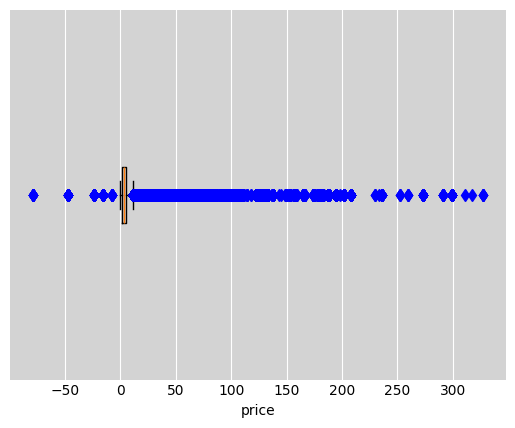

In [5]:
fig, ax = plt.subplots()
ax.set_axisbelow(True)
ax.set_facecolor('lightgrey')
bp = ax.boxplot(prices, vert=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for flier in bp['fliers']:
    flier.set(marker ='d', markerfacecolor='blue', markeredgecolor='blue')
ax.set_xlabel('price')
plt.yticks([]) 
ax.tick_params(length=0)
ax.grid(True, axis='x', color='white')
plt.show()

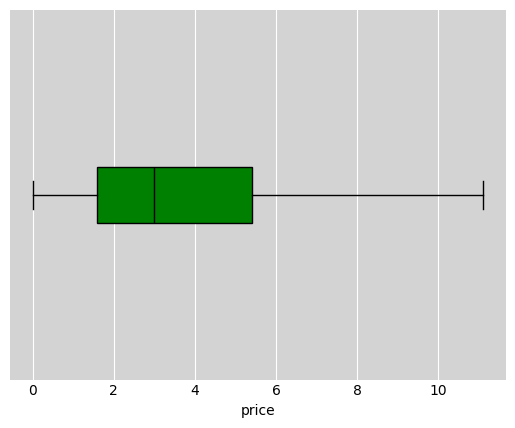

In [6]:
fig, ax = plt.subplots()
ax.set_axisbelow(True)
ax.set_facecolor('lightgrey')
bp = ax.boxplot(prices, vert=False, patch_artist=True, showmeans=False, showfliers=False,)
for median in bp['medians']:
    median.set(color ='black')
for patch in bp['boxes']:
    patch.set_facecolor(color='green')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('price')
plt.yticks([]) 
ax.tick_params(length=0)
ax.grid(True, axis='x', color='white')
plt.show()

In [43]:
cursor.execute("""
                SELECT AVG(price) as basket_price
                FROM customers
                WHERE event_type='purchase'
                GROUP BY user_id;
                """)
basket = np.array(res).flatten()

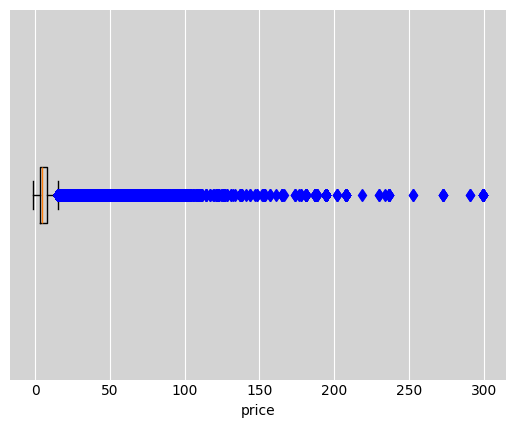

In [44]:
fig, ax = plt.subplots()
ax.set_axisbelow(True)
ax.set_facecolor('lightgrey')
bp = ax.boxplot(basket, vert=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for flier in bp['fliers']:
    flier.set(marker ='d', markerfacecolor='blue', markeredgecolor='blue')
ax.set_xlabel('price')
plt.yticks([]) 
ax.tick_params(length=0)
ax.grid(True, axis='x', color='white')
plt.show()